In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Initializing

I've packed up some code from the previous notebooks into functions and placed them in `tide_utils.py`, for code hygiene. Let's import that, and then load in the data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from astropy.io import fits
from pixell import enmap

import tide_utils

In [3]:
tidal, galaxy_data, mask = tide_utils.load_files(
    tidal_filename="../outputs/out_2MASS_XSC_EQ/tidal_sm2.0.fits", 
    galaxy_cat_filename="../data/2MASS_XSC.fits", 
    mask_filename="../outputs/out_2MASS_XSC_EQ/mask.fits",
    verbose=False)

npix = len(mask)
nside = hp.get_nside(mask)

## Basic Calculations
We compute the principal eigenvectors and eigenvalues, and compute the ellipticity vector array for the galaxies as well.

In [4]:
# calculate stuff for tidal field
peigval, peigvec = tide_utils.compute_principal_eig(
    t11= tidal['t11'],
    t12= -tidal['t12'], # NOTE: flipped sign!
    t22= tidal['t22'])

# calculate stuff for galaxies
phi_x = -np.cos((90-galaxy_data['j_phi']) * np.pi / 180)
phi_y = np.sin((90-galaxy_data['j_phi']) * np.pi / 180)
gal_ellip = np.vstack( [phi_x,phi_y] )
gal_healpix_pixel = hp.ang2pix( nside=nside, 
    phi=galaxy_data['dec'], theta=galaxy_data['ra'], lonlat=True )

## Test Plots

We plot the tidal field and an example row of galaxies, to demonstrate that things seem to work.

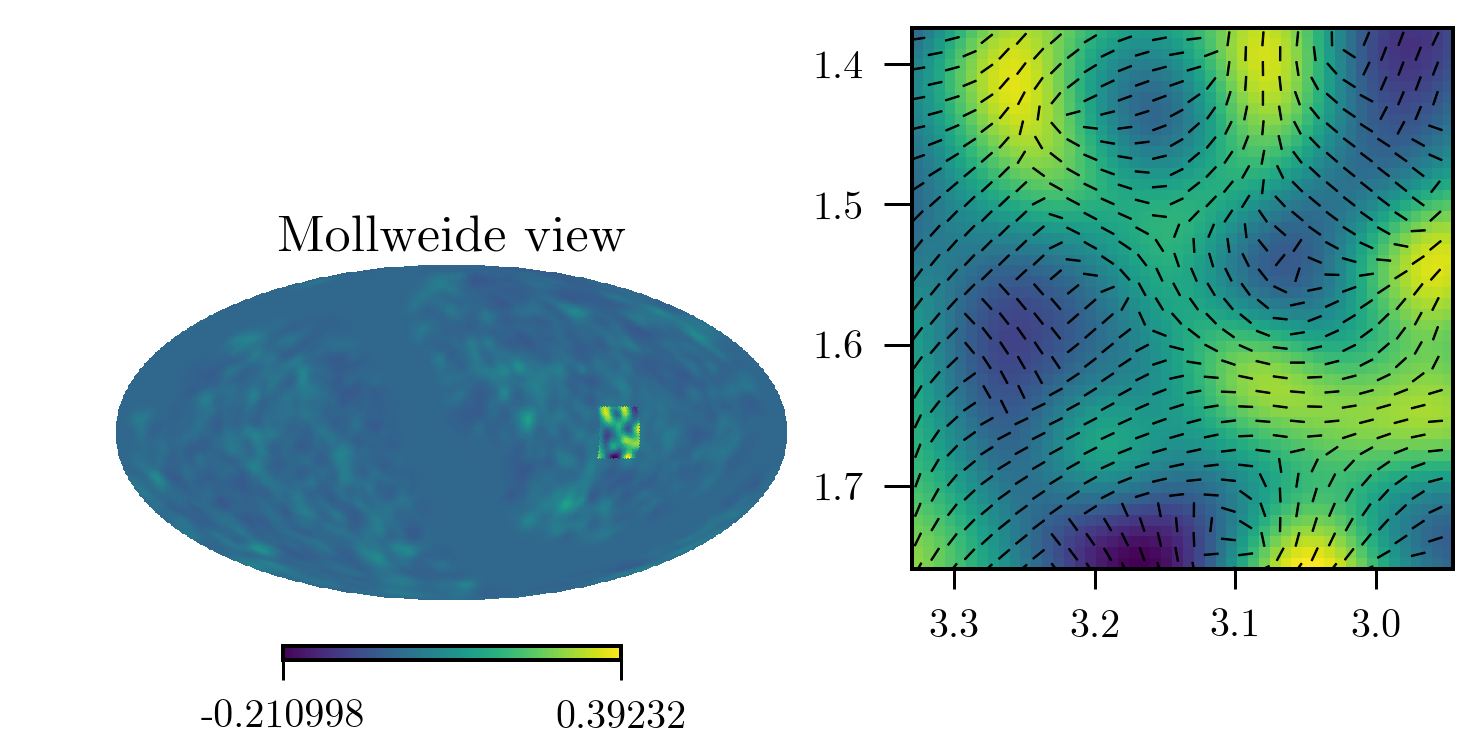

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,8), gridspec_kw={'width_ratios':[1,0.8]})
plt.sca(ax1)

bounding_box = (np.pi - np.pi/16, np.pi + np.pi/16, np.pi/2-np.pi/16, np.pi/2+np.pi/16)
smoothed_cutout, ph_grid, th_grid = tide_utils.get_cutout_from_hp(
    tidal['den'], bbox=bounding_box, debug=True, hold=True, rot=(-90,0,0)) 
# NOTE: we rotate the mollweide by -90 in phi for visual aid, since it would be on the edge

plt.sca(ax2)
plt.imshow(smoothed_cutout.T,
          extent=( np.min(ph_grid), np.max(ph_grid), np.max(th_grid), np.min(th_grid)) )
tide_utils.plot_vectorfield(ax2, bounding_box, nside, peigvec)
plt.xlim( np.max(ph_grid), np.min(ph_grid) ); plt.ylim( np.max(th_grid), np.min(th_grid) );

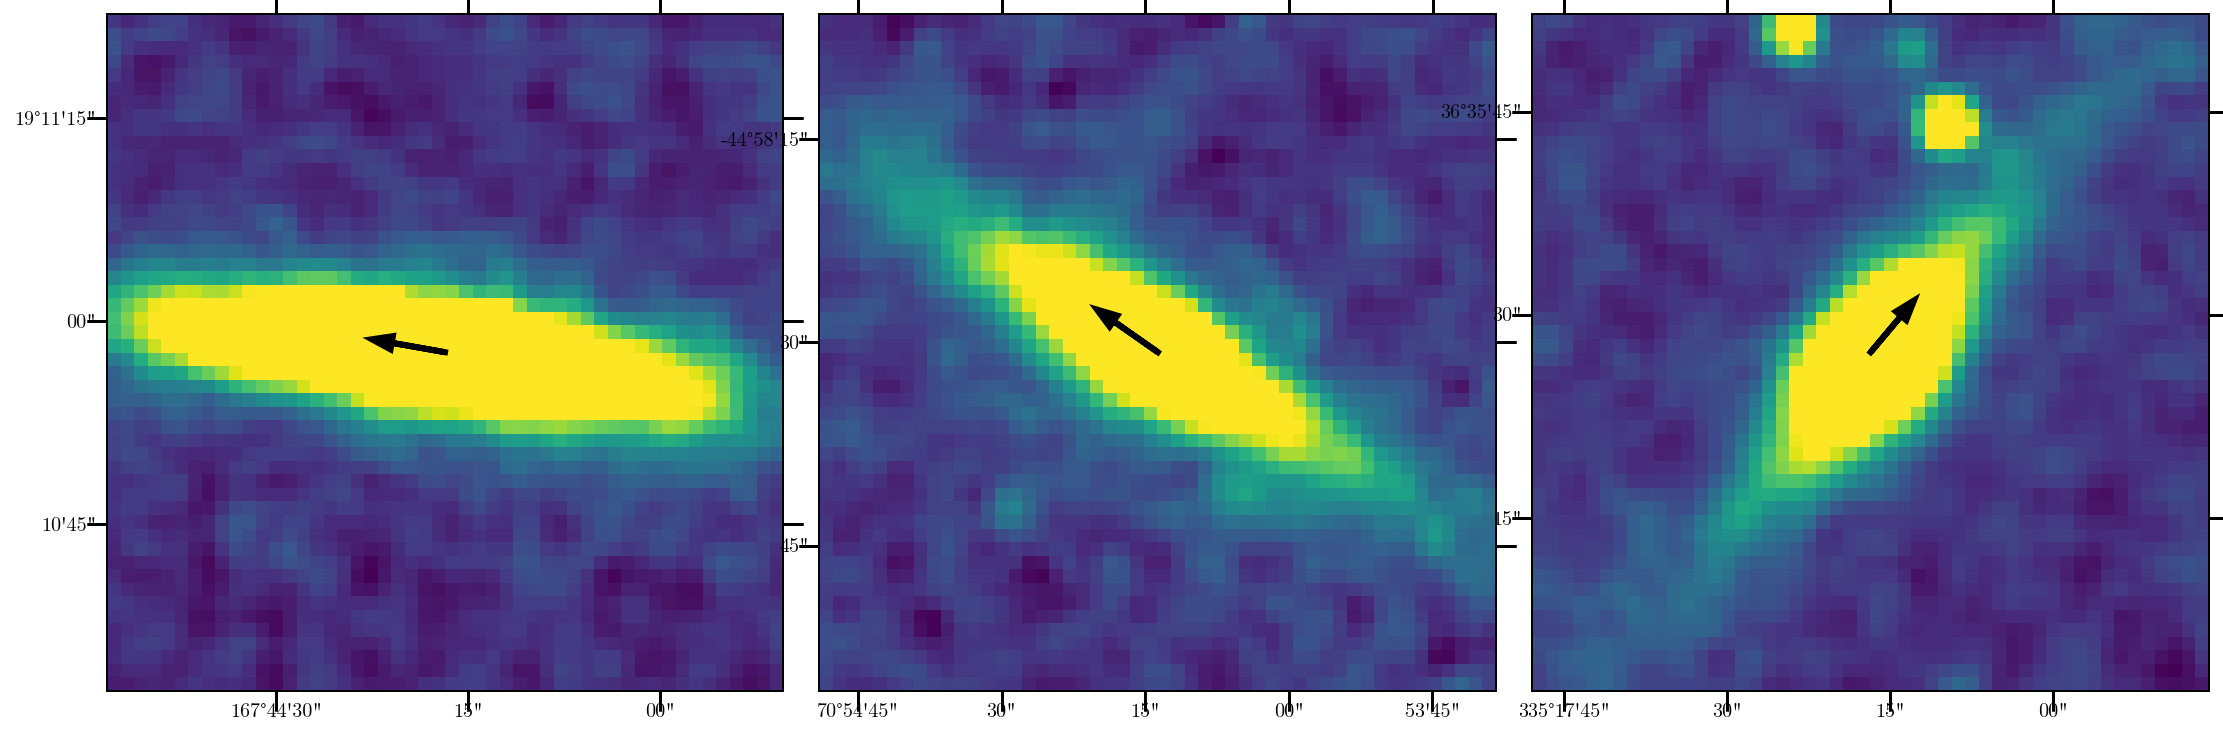

In [6]:
tide_utils.plot_row([161, 215, 242], # chosen from magnitude cut
                    galaxy_data, phi_x, phi_y) 